## Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

## Loading dataset

Dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Analyzing the dataset

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


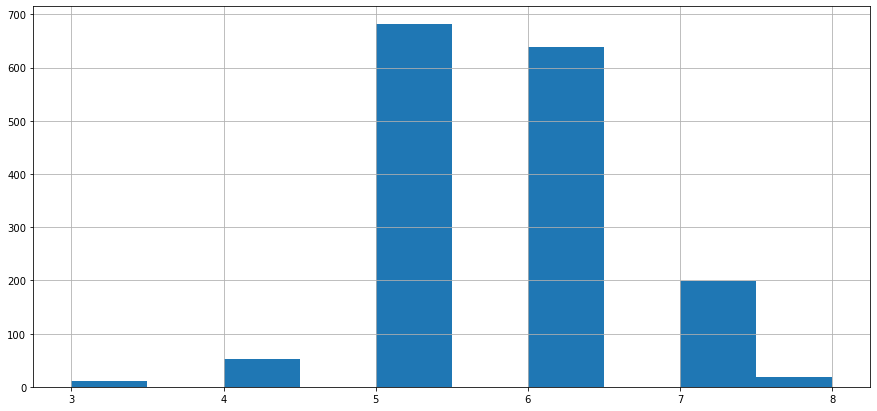

In [6]:
df['quality'].hist(figsize=(15, 7))

## Shuffling the dataset

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.3,0.410,0.39,2.2,0.064,12.0,31.0,0.99840,3.26,0.65,10.2,5
1,7.0,0.490,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5,5
2,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
3,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,4
4,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.1,0.360,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,5
1595,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
1596,8.5,0.440,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5
1597,6.5,0.460,0.14,2.4,0.114,9.0,37.0,0.99732,3.66,0.65,9.8,5


## Splitting dataframe into dependent & independent variables

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

## Standardization

In [9]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [10]:
# y = y/10
# y

## Splitting into training & test sets

In [11]:
X_train, X_divide, y_train, y_divide = train_test_split(X, y, test_size=0.2)
X_validate, X_test, y_validate, y_test = train_test_split(X_divide, y_divide, test_size=0.5)

## Building the ANN

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', input_dim=11),
    tf.keras.layers.Dropout(rate=0.2),   # To overcome overfitting
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
])

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'RootMeanSquaredError'])

In [14]:
# # custom callback
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('loss')<0.4):
#             print("\nLoss is low so cancelling training!")
#             self.model.stop_training = True
            
# early_stopping = myCallback()

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [16]:
model.fit(X_train, y_train, validation_data=(X_validate, y_validate), callbacks=[early_stopping], epochs=100, batch_size=10, verbose=2)

Train on 1279 samples, validate on 160 samples
Epoch 1/100
1279/1279 - 3s - loss: 29.7661 - accuracy: 0.0000e+00 - RootMeanSquaredError: 5.4558 - val_loss: 23.4383 - val_accuracy: 0.0000e+00 - val_RootMeanSquaredError: 4.8413
Epoch 2/100
1279/1279 - 0s - loss: 16.0926 - accuracy: 0.0000e+00 - RootMeanSquaredError: 4.0116 - val_loss: 8.1739 - val_accuracy: 0.0000e+00 - val_RootMeanSquaredError: 2.8590
Epoch 3/100
1279/1279 - 0s - loss: 7.3805 - accuracy: 0.0000e+00 - RootMeanSquaredError: 2.7167 - val_loss: 3.8236 - val_accuracy: 0.0000e+00 - val_RootMeanSquaredError: 1.9554
Epoch 4/100
1279/1279 - 0s - loss: 5.1282 - accuracy: 0.0000e+00 - RootMeanSquaredError: 2.2646 - val_loss: 2.4090 - val_accuracy: 0.0000e+00 - val_RootMeanSquaredError: 1.5521
Epoch 5/100
1279/1279 - 0s - loss: 3.7582 - accuracy: 0.0000e+00 - RootMeanSquaredError: 1.9386 - val_loss: 1.5891 - val_accuracy: 0.0000e+00 - val_RootMeanSquaredError: 1.2606
Epoch 6/100
1279/1279 - 0s - loss: 2.7750 - accuracy: 0.0000e+00 

In [17]:
y_pred = model.predict(X_test)

In [18]:
pd.concat([pd.DataFrame(y_pred, columns=['Predicted']), pd.DataFrame(y_test, columns=['True'])], axis=1)

,Predicted,True
0,5.224605,5
1,5.703047,6
2,5.940955,6
3,5.417463,5
4,5.187199,5
...,...,...
155,6.199329,4
156,5.713751,6
157,5.215928,5
158,5.975677,6


In [19]:
print('R2_Score:', metrics.r2_score(y_test, y_pred))  # Best possible score is 1.0
print('Root_Mean_Squared_Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  # Should be as low as possible

R2_Score: 0.299913187704572
Root_Mean_Squared_Error:  0.6744976200310918


## Evaluating using K-Fold Validation

In [20]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=8, activation='relu', input_dim=11),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='relu')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])
    return model

In [21]:
regressor = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, batch_size=10, epochs=100)

In [22]:
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, n_jobs=-1)

In [23]:
accuracies

array([-32.57031229, -32.25781238, -32.55468732,  -0.4394861 ,
        -0.51723033,  -0.49536342,  -0.46773865,  -0.41286973,
       -32.22656217,  -0.34038489])

In [24]:
print('Min:', min(accuracies))
print('Max:', max(accuracies))
print('Mean:', accuracies.mean())
print('Standard Deviation:', accuracies.std())

Min: -32.57031229138374
Max: -0.34038489446865294
Mean: -13.228244729125763
Standard Deviation: 15.655980503097968


## Tuning using GridSearchCV

In [25]:
def build_model(opt):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=8, activation='relu', input_dim=11),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='relu')
    ])
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
    return model

In [26]:
regressor = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)

In [27]:
parameters = {'batch_size': [10, 25, 32], 'opt': ['adam', 'rmsprop'], 'epochs': [100, 200]}

In [28]:
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='r2', cv=10, n_jobs=-1)

In [29]:
grid_search = grid_search.fit(X_train, y_train)

Train on 1279 samples
Epoch 1/200
1279/1279 [==============================] - 2s 2ms/sample - loss: 15.3710 - accuracy: 0.0000e+00
Epoch 2/200
1279/1279 [==============================] - 0s 155us/sample - loss: 4.2200 - accuracy: 0.0000e+00
Epoch 3/200
1279/1279 [==============================] - 0s 142us/sample - loss: 2.4461 - accuracy: 0.0000e+00
Epoch 4/200
1279/1279 [==============================] - 0s 242us/sample - loss: 1.8866 - accuracy: 0.0000e+00
Epoch 5/200
1279/1279 [==============================] - 0s 253us/sample - loss: 1.5572 - accuracy: 0.0000e+00
Epoch 6/200
1279/1279 [==============================] - 0s 234us/sample - loss: 1.3248 - accuracy: 0.0000e+00
Epoch 7/200
1279/1279 [==============================] - 0s 237us/sample - loss: 1.1740 - accuracy: 0.0000e+00
Epoch 8/200
1279/1279 [==============================] - 0s 245us/sample - loss: 1.0378 - accuracy: 0.0000e+00
Epoch 9/200
1279/1279 [==============================] - 0s 218us/sample - loss: 0.9389 - a

1279/1279 [==============================] - 0s 134us/sample - loss: 0.4030 - accuracy: 0.0000e+00
Epoch 75/200
1279/1279 [==============================] - 0s 122us/sample - loss: 0.4026 - accuracy: 0.0000e+00
Epoch 76/200
1279/1279 [==============================] - 0s 134us/sample - loss: 0.3995 - accuracy: 0.0000e+00
Epoch 77/200
1279/1279 [==============================] - 0s 146us/sample - loss: 0.4020 - accuracy: 0.0000e+00
Epoch 78/200
1279/1279 [==============================] - 0s 273us/sample - loss: 0.4025 - accuracy: 0.0000e+00
Epoch 79/200
1279/1279 [==============================] - 0s 203us/sample - loss: 0.3978 - accuracy: 0.0000e+00
Epoch 80/200
1279/1279 [==============================] - 0s 221us/sample - loss: 0.4009 - accuracy: 0.0000e+00
Epoch 81/200
1279/1279 [==============================] - 0s 239us/sample - loss: 0.3994 - accuracy: 0.0000e+00
Epoch 82/200
1279/1279 [==============================] - 0s 201us/sample - loss: 0.3968 - accuracy: 0.0000e+00
Epoch

In [30]:
print('Best Parameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)

Best Parameters: {'batch_size': 10, 'epochs': 200, 'opt': 'adam'}
Best Accuracy: 0.2929942862635161
